# FRAUD DETECTION MODEL - MOBILE MONEY TRANSACTIONS

#### Import Relevant Pakages

In [361]:
#pip install lightgbm

## Step 1 - Import the necessary Modules & Packages needed...

In [251]:
#==================================================================
# Define the core libraries
### Import all the relevant Modules & Library Packages I'll need...
#==================================================================
%matplotlib inline

import numpy                 as     np
import pandas                as     pd
import seaborn               as     sns
import matplotlib.pyplot     as     plt
from   pylab                 import rcParams
 

# sklearn modules for preprocessing
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder
from imblearn.over_sampling  import SMOTE,RandomOverSampler  # SMOTE


# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

 
# Libraries for ML modelling
from   sklearn               import linear_model
from   sklearn.linear_model  import LogisticRegression

 
# Common sklearn Model Helpers
from sklearn                 import feature_selection
from sklearn                 import model_selection
from sklearn                 import metrics

# sklearn modules for performance Measures
#===========================================
from sklearn.metrics         import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics         import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics         import f1_score, accuracy_score
from sklearn.metrics         import average_precision_score


# Import Further Modules/Packages...
#==================================
import warnings 
import itertools
import statsmodels.api as sm
 
# Modules for WOE/IV if needed cals....
#==========================
import re
import traceback
import string
import pandas.core.algorithms as     algois
import scipy.stats.stats      as     stats
from   pandas                 import Series
from   pandas                 import DataFrame

 
# For VAR Importance Selection..
#===============================
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel


# combine all variables selection criteria and select FINAL Best variables...
from functools                 import reduce
 
# for MULTICOLLINEARITY Checks & removal...
#===========================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection            import chi2
 
# SQL Modules for writing SQL...
#===============================
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())

 
# this will help ignore all warnings likely to be printed...
#===========================================================
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
print(sns.__version__)

!pwd

0.11.2
/Users/spacs


# Step 2 - Import your raw dataset.

In [2]:
#read in the dataset from the location you have saved the dataset..
#==================================================================
df = pd.read_csv(r'/Users/spacs/Desktop/MM_fraud_dataset.csv')


In [3]:
# view the first 5 rows of your dataset..
#=======================================
df.head(5)

,TX_Type,TX_Amount,TX_Originator,TX_IBalance,TX_NBalance,TX_Recipient,TX_IBB4_trans,TX_NBAFT_trans,isFraud,isFlaggedFraud,ip_address,Email_Address,TX_Date
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,46.41.252.160,fake_acostasusan@example.org,10/8/19 20:44
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,152.58.247.12,fake_christopheryoung@example.com,5/23/20 19:44
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,12.252.206.222,fake_jeffrey09@example.org,4/24/20 18:26
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,170.81.164.240,fake_ncastro@example.org,4/22/20 19:07
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,165.182.68.217,fake_charles99@example.org,12/31/19 17:08


In [4]:
# view the last 5 rows of your dataset..
#=======================================
df.tail(5)

,TX_Type,TX_Amount,TX_Originator,TX_IBalance,TX_NBalance,TX_Recipient,TX_IBB4_trans,TX_NBAFT_trans,isFraud,isFlaggedFraud,ip_address,Email_Address,TX_Date
19995,PAYMENT,17031.89,C1718873127,105935.0,88903.11,M838307590,0.00,0.00,0,0,144.118.247.10,fake_ryan85@example.com,10/1/19 20:33
19996,CASH_IN,121530.49,C218252593,10430.0,131960.49,C1192983708,99479.60,98055.06,0,0,74.133.15.41,fake_tammybanks@example.net,6/11/20 22:24
19997,TRANSFER,780953.77,C1098444577,905174.0,124220.23,C1629911510,3145.61,1925872.77,0,0,35.207.109.37,fake_maryaguilar@example.com,4/27/20 14:02
19998,PAYMENT,9987.56,C940782077,39734.0,29746.44,M898700870,0.00,0.00,0,0,108.51.232.130,fake_susan27@example.org,4/17/20 6:28
19999,CASH_IN,149516.02,C715515400,100643.0,250159.02,C955610633,30427.00,0.00,0,0,31.175.34.58,fake_knewman@example.net,6/7/20 5:44


In [5]:
# view the "contents"(eg: column names, total records, data types) of your dataset..
#==================================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TX_Type         20000 non-null  object 
 1   TX_Amount       20000 non-null  float64
 2   TX_Originator   20000 non-null  object 
 3   TX_IBalance     20000 non-null  float64
 4   TX_NBalance     20000 non-null  float64
 5   TX_Recipient    20000 non-null  object 
 6   TX_IBB4_trans   20000 non-null  float64
 7   TX_NBAFT_trans  20000 non-null  float64
 8   isFraud         20000 non-null  int64  
 9   isFlaggedFraud  20000 non-null  int64  
 10  ip_address      20000 non-null  object 
 11  Email_Address   20000 non-null  object 
 12  TX_Date         20000 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


# Step 3 - EDA(Exploratory Data Analysis).
create Summary Statistics from your dataset to glen few undestanding
eg. identifying missing values, proportions of fraud cases, correlation analysis etc..

In [6]:
# firstly drop unnecssary features not needed from your dataset..
# NB: Add to the "drop_list" list if there are more features to be excluded 
#===========================================================================
drop_list = ['isFlaggedFraud']          
df = df.drop(drop_list, axis=1)
df.head()

,TX_Type,TX_Amount,TX_Originator,TX_IBalance,TX_NBalance,TX_Recipient,TX_IBB4_trans,TX_NBAFT_trans,isFraud,ip_address,Email_Address,TX_Date
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,46.41.252.160,fake_acostasusan@example.org,10/8/19 20:44
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,152.58.247.12,fake_christopheryoung@example.com,5/23/20 19:44
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,12.252.206.222,fake_jeffrey09@example.org,4/24/20 18:26
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,170.81.164.240,fake_ncastro@example.org,4/22/20 19:07
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,165.182.68.217,fake_charles99@example.org,12/31/19 17:08


In [7]:
# Checking for the percentage of null values in dataset
#=======================================================
df.isna().mean() * 100

TX_Type           0.0
TX_Amount         0.0
TX_Originator     0.0
TX_IBalance       0.0
TX_NBalance       0.0
TX_Recipient      0.0
TX_IBB4_trans     0.0
TX_NBAFT_trans    0.0
isFraud           0.0
ip_address        0.0
Email_Address     0.0
TX_Date           0.0
dtype: float64

Distribution of Fraud cases in the original dataset:
0    19919
1       81
Name: isFraud, dtype: int64



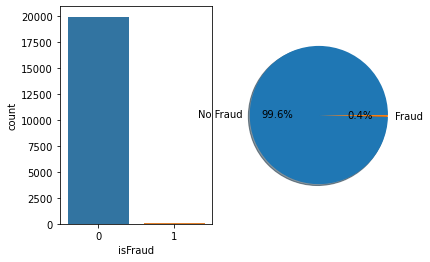

In [8]:
# Key Distribution of "Fraud" Category in the final dataset...
#==============================================================
ax      = plt.subplot(1,2,1)
sns.countplot(x='isFraud', data = df)
labels2 = ['No Fraud', 'Fraud']
labels1 = df['isFraud'].astype('category').cat.categories.tolist()
counts1 = df['isFraud'].value_counts()
sizes   = [counts1[var_cat] for var_cat in labels1]
ax      = plt.subplot(1,2,2)
ax.pie(sizes, labels = labels2, autopct ='%1.1f%%', shadow=True)
ax.axis('equal')

print('Distribution of Fraud cases in the original dataset:')
print('====================================================')
print(df.isFraud.value_counts())
print('')
plt.show()

In [9]:
# Checking customer transactions for repeated fradulent cases..
#==============================================================
count_fraud    = df.loc[(df['isFraud'] == 1) ]
count_nameOrig = count_fraud['TX_Originator'].value_counts()
count_nameOrig.sort_values(ascending = False)
count_nameOrig.head()

C1305486145    1
C840095827     1
C1191732945    1
C777407608     1
C1484518113    1
Name: TX_Originator, dtype: int64

In [10]:
# Checking desposited transactions for repeated fradulent cases
#==============================================================
count_nameDest = count_fraud['TX_Recipient'].value_counts()
count_nameDest.sort_values()
count_nameDest.head()


C410033330     2
C553264065     1
C1315078366    1
C418964192     1
C1790657739    1
Name: TX_Recipient, dtype: int64

<AxesSubplot:xlabel='TX_Type', ylabel='count'>

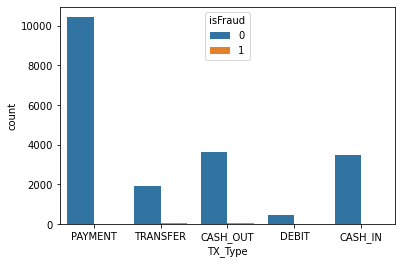

In [11]:
#plot fraud distribution vs transaction types
#=============================================
sns.countplot(x = 'TX_Type', hue= 'isFraud', data = df)

 There're more *non-fraud cases in "PAYMENT" transactions compared to the rest

visualize correlation plots of all numeric features


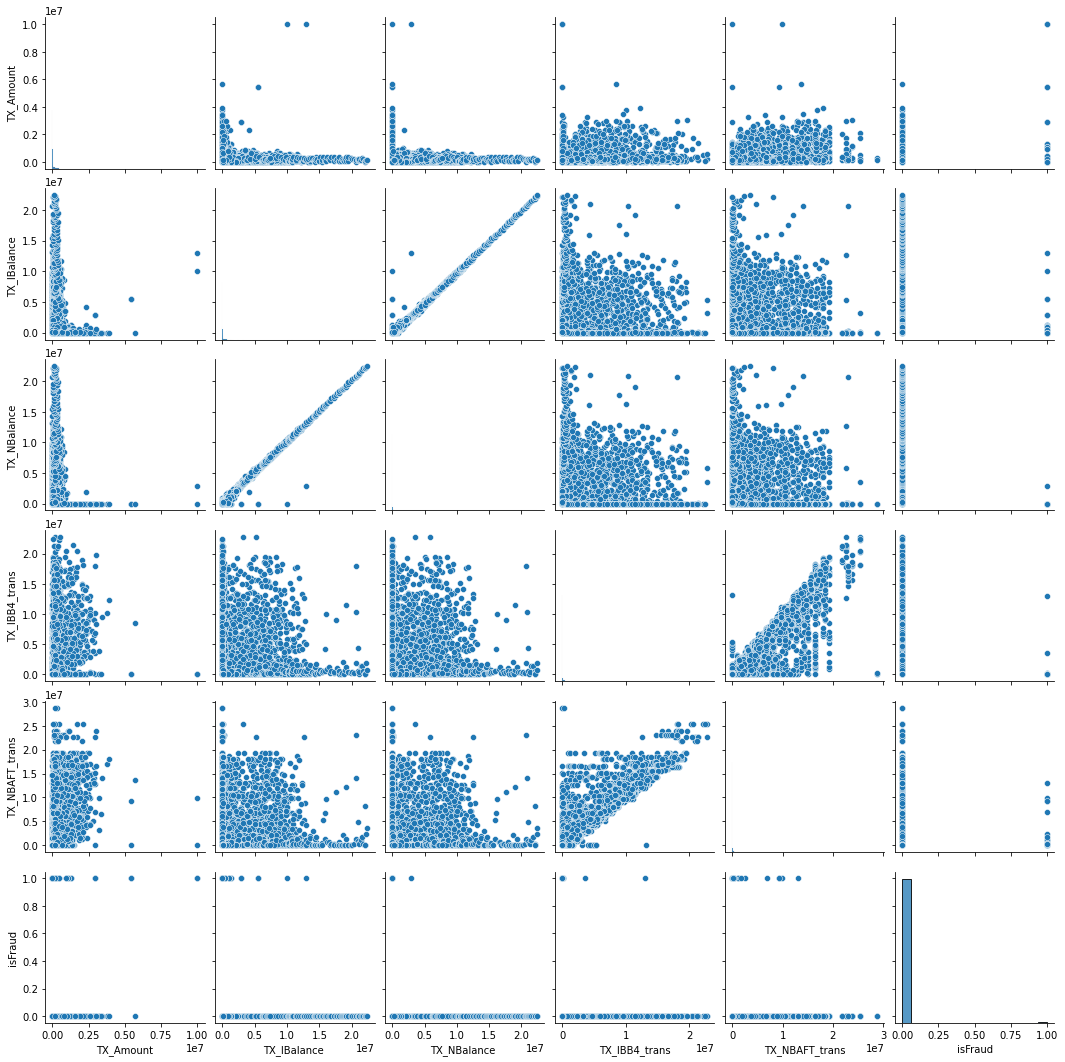

In [12]:
# visualize correlation plots of all numeric features in your dataset excluding the target outcome..
# key: to help visually spot any possible multicollinearity in the input numeric features
#====================================================================================================
#sns.pairplot(df[df.columns.difference(['isFraud'])])
sns.pairplot(df) #[df.columns.difference(['isFraud'])])
print('visualize correlation plots of all numeric features')
print('===================================================')

From the output above, "TX_NBalance" & "TX_IBalance" seems to be highly correlated.This is a classical example of visually identifying multicollinearity which will be taken care of later before the models are built

In [13]:
# get counts for all categorical features in your data..
#======================================================
df.describe(include='object').T

,count,unique,top,freq
TX_Type,20000,5,PAYMENT,10440
TX_Originator,20000,20000,C1231006815,1
TX_Recipient,20000,12872,C985934102,67
ip_address,20000,1324,30.252.183.216,113
Email_Address,20000,1494,fake_lcook@example.org,73
TX_Date,20000,19632,11/1/19 20:10,3


As seen above,the categorical(including data types seen as 'object') variables having their values occuring at least once are listed under the "top" column
eg. PAYMENT occurs 10,440 times in the dataset, but altogether there are 5 unique "TX_Type" in the dataset

In [47]:
#df.TX_Type.describe().T

In [14]:
# identify how many unique values(elements) are there in eg. TX_Type feature..
#=============================================================================
df.TX_Type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
#df.dtypes

In [16]:
# get summary stats for all Numeric features in your data..
#===========================================================
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TX_Amount,20000.0,1.259584e+05,2.967104e+05,2.39,5272.0175,15825.175,141661.6450,10000000.0
TX_IBalance,20000.0,8.050846e+05,2.213575e+06,0.00,0.0000,19943.500,127412.6125,22400000.0
TX_NBalance,20000.0,8.215483e+05,2.255338e+06,0.00,0.0000,5718.700,128794.9200,22500000.0
TX_IBB4_trans,20000.0,8.159476e+05,2.481525e+06,0.00,0.0000,0.000,288767.7500,22800000.0
TX_NBAFT_trans,20000.0,1.174437e+06,3.147628e+06,0.00,0.0000,0.000,428409.3200,28800000.0
isFraud,20000.0,4.050000e-03,6.351220e-02,0.00,0.0000,0.000,0.0000,1.0


 Looking through the "count" column, we can see that there are "no missing" values identified. In reality, there will be few. Dealing with missing values will be elaborated briefly in the next cell below

In [17]:
# select eg. ALL NUMERIC variables and identify if there are any missing values.
# np.datetime64
#===============================================================================
df3_num = df.select_dtypes(include=['float'])
df3_num.info()
 
percent_missing  = df3_num.isnull().sum() * 100/len(df3_num)
missing_value_df = pd.DataFrame({'column_name':df3_num.columns,'percent_missing':percent_missing})
 
missing_value_df.sort_values('percent_missing', ascending=0, inplace=True)
missing_value_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TX_Amount       20000 non-null  float64
 1   TX_IBalance     20000 non-null  float64
 2   TX_NBalance     20000 non-null  float64
 3   TX_IBB4_trans   20000 non-null  float64
 4   TX_NBAFT_trans  20000 non-null  float64
dtypes: float64(5)
memory usage: 781.4 KB


,column_name,percent_missing
TX_Amount,TX_Amount,0.0
TX_IBalance,TX_IBalance,0.0
TX_NBalance,TX_NBalance,0.0
TX_IBB4_trans,TX_IBB4_trans,0.0
TX_NBAFT_trans,TX_NBAFT_trans,0.0


NB: The "percent_missing" column explains what %age of missing values are present. if there are, you can fill them with the example "median" values

# Step 4 - Feature    Engineering.
We aim to transform all potential categorical variables into dummies, and create other additional smatter features where necessary 

In [65]:
df.describe(include='object').T

,count,unique,top,freq
TX_Type,20000,5,PAYMENT,10440
TX_Originator,20000,20000,C1231006815,1
TX_Recipient,20000,12872,C985934102,67
ip_address,20000,1324,30.252.183.216,113
Email_Address,20000,1494,fake_lcook@example.org,73
TX_Date,20000,19632,11/1/19 20:10,3


### OHE- One Hot Encoding

In [19]:
#create dummies(using OHE- one hot encoding) for all the TX_Type feature...
#=====================================================================
excl = ['TX_Originator','TX_Recipient','ip_address','Email_Address','TX_Date'] # exclude these variables when creating the dummies 
df_OHE = pd.get_dummies((df[df.columns.difference(excl)]), drop_first = False) 
df_OHE['TX_Originator'] = df[['TX_Originator']].copy(deep=True)

print(df_OHE.shape)
df_OHE.head()


(20000, 12)


,TX_Amount,TX_IBB4_trans,TX_IBalance,TX_NBAFT_trans,TX_NBalance,isFraud,TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER,TX_Originator
0,9839.64,0.0,170136.0,0.0,160296.36,0,0,0,0,1,0,C1231006815
1,1864.28,0.0,21249.0,0.0,19384.72,0,0,0,0,1,0,C1666544295
2,181.00,0.0,181.0,0.0,0.00,1,0,0,0,0,1,C1305486145
3,181.00,21182.0,181.0,0.0,0.00,1,0,1,0,0,0,C840083671
4,11668.14,0.0,41554.0,0.0,29885.86,0,0,0,0,1,0,C2048537720


### Create Smarter Variables(features)..

In [20]:
#-- Extract the # of digits from the customers Email..
#========================================================
df_Email = df[['TX_Originator','isFraud','Email_Address']].copy(deep=True)
df_Email['NumbDigits_Email'] = df_Email.apply(lambda row: (sum(1 for x in row['Email_Address'] if x.isdigit())), axis=1)
df_Email.head()

,TX_Originator,isFraud,Email_Address,NumbDigits_Email
0,C1231006815,0,fake_acostasusan@example.org,0
1,C1666544295,0,fake_christopheryoung@example.com,0
2,C1305486145,1,fake_jeffrey09@example.org,2
3,C840083671,1,fake_ncastro@example.org,0
4,C2048537720,0,fake_charles99@example.org,2


## Merge your datasets

In [24]:
# merge "df_OHE" & "df_Email" & drop off your "Email_address"..
#=============================================================
df_merge1 = pd.merge(df_OHE, df_Email, left_on=['TX_Originator'], right_on=['TX_Originator'], how='inner')
df_merge2 = df_merge1.drop(columns=['Email_Address'], axis=1)
df_merge2.head()

,TX_Amount,TX_IBB4_trans,TX_IBalance,TX_NBAFT_trans,TX_NBalance,isFraud_x,TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER,TX_Originator,isFraud_y,NumbDigits_Email
0,9839.64,0.0,170136.0,0.0,160296.36,0,0,0,0,1,0,C1231006815,0,0
1,1864.28,0.0,21249.0,0.0,19384.72,0,0,0,0,1,0,C1666544295,0,0
2,181.00,0.0,181.0,0.0,0.00,1,0,0,0,0,1,C1305486145,1,2
3,181.00,21182.0,181.0,0.0,0.00,1,0,1,0,0,0,C840083671,1,0
4,11668.14,0.0,41554.0,0.0,29885.86,0,0,0,0,1,0,C2048537720,0,2


In [25]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TX_Amount         20000 non-null  float64
 1   TX_IBB4_trans     20000 non-null  float64
 2   TX_IBalance       20000 non-null  float64
 3   TX_NBAFT_trans    20000 non-null  float64
 4   TX_NBalance       20000 non-null  float64
 5   isFraud_x         20000 non-null  int64  
 6   TX_Type_CASH_IN   20000 non-null  uint8  
 7   TX_Type_CASH_OUT  20000 non-null  uint8  
 8   TX_Type_DEBIT     20000 non-null  uint8  
 9   TX_Type_PAYMENT   20000 non-null  uint8  
 10  TX_Type_TRANSFER  20000 non-null  uint8  
 11  TX_Originator     20000 non-null  object 
 12  isFraud_y         20000 non-null  int64  
 13  NumbDigits_Email  20000 non-null  int64  
dtypes: float64(5), int64(3), object(1), uint8(5)
memory usage: 1.6+ MB


In [26]:
df_merge2.dtypes

TX_Amount           float64
TX_IBB4_trans       float64
TX_IBalance         float64
TX_NBAFT_trans      float64
TX_NBalance         float64
isFraud_x             int64
TX_Type_CASH_IN       uint8
TX_Type_CASH_OUT      uint8
TX_Type_DEBIT         uint8
TX_Type_PAYMENT       uint8
TX_Type_TRANSFER      uint8
TX_Originator        object
isFraud_y             int64
NumbDigits_Email      int64
dtype: object

## Re-order/drop & rename variables

In [27]:
## re-order the features in the dataset accordingly as you want...
#==================================================================
df_merge3 = df_merge2[['TX_Originator','isFraud_y'] + 
                     [col for col in df_merge2.columns if col not in ['TX_Originator','isFraud_y']]]


# drop unnecessary variables & rename fraud properly .....
#=========================================================
df_merge3 = df_merge3.drop(['isFraud_x'], axis=1) #drop un-neccessary feature...

vars = {'isFraud_y':'isFraud'} # list of variables you want to rename
df_merge = df_merge3.rename(columns = vars)
df_merge.head()


,TX_Originator,isFraud,TX_Amount,TX_IBB4_trans,TX_IBalance,TX_NBAFT_trans,TX_NBalance,TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER,NumbDigits_Email
0,C1231006815,0,9839.64,0.0,170136.0,0.0,160296.36,0,0,0,1,0,0
1,C1666544295,0,1864.28,0.0,21249.0,0.0,19384.72,0,0,0,1,0,0
2,C1305486145,1,181.00,0.0,181.0,0.0,0.00,0,0,0,0,1,2
3,C840083671,1,181.00,21182.0,181.0,0.0,0.00,0,1,0,0,0,0
4,C2048537720,0,11668.14,0.0,41554.0,0.0,29885.86,0,0,0,1,0,2


Distribution of Fraud cases in the Merged dataset:
0    19919
1       81
Name: isFraud, dtype: int64



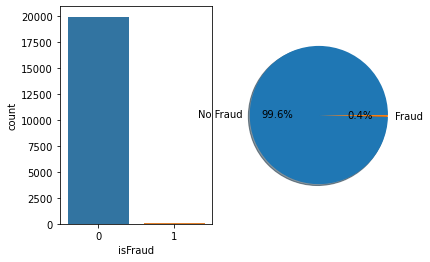

In [28]:
# Re-check that the distribution of "Fraud" category is still consistent after pre-processing the dataset..
#==========================================================================================================
ax      = plt.subplot(1,2,1)
sns.countplot(x='isFraud', data = df_merge)
labels2 = ['No Fraud', 'Fraud']
labels1 = df_merge['isFraud'].astype('category').cat.categories.tolist()
counts1 = df_merge['isFraud'].value_counts()
sizes   = [counts1[var_cat] for var_cat in labels1]
ax      = plt.subplot(1,2,2)
ax.pie(sizes, labels = labels2, autopct ='%1.1f%%', shadow=True)
ax.axis('equal')

print('Distribution of Fraud cases in the Merged dataset:')
print('==================================================')
print(df_merge.isFraud.value_counts())
print('')
plt.show()

# Step 5 -  Variable Selection Criteria 


In [29]:
#prep the data ready for selection criteria...
#=============================================
features = df_merge[df_merge.columns.difference(['TX_Originator','isFraud'])] # select all features except these listed
labels   = df_merge['isFraud'] # select only the Target(isFraud) variable
features = features.fillna(0)  # fill all missing features with zero(0) value... NB it's possible there will be none
 

#get some summaries ...
print(features.shape)
print(features.dtypes)

df_merge.isFraud.value_counts()


(20000, 11)
NumbDigits_Email      int64
TX_Amount           float64
TX_IBB4_trans       float64
TX_IBalance         float64
TX_NBAFT_trans      float64
TX_NBalance         float64
TX_Type_CASH_IN       uint8
TX_Type_CASH_OUT      uint8
TX_Type_DEBIT         uint8
TX_Type_PAYMENT       uint8
TX_Type_TRANSFER      uint8
dtype: object


0    19919
1       81
Name: isFraud, dtype: int64

In [30]:
#####################################################
#Variable Importance(using Random Forest approach)..
#====================================================
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=2)
 
clf.fit(features,labels)
preds = clf.predict(features)
 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print('RForest Feature Selection Accuracy is:', accuracy)
print('======================================')

from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


,index,RF
1,TX_Amount,0.299453
3,TX_IBalance,0.244309
4,TX_NBAFT_trans,0.181597
2,TX_IBB4_trans,0.178306
5,TX_NBalance,0.037158
10,TX_Type_TRANSFER,0.022875
7,TX_Type_CASH_OUT,0.013295
0,NumbDigits_Email,0.009146
9,TX_Type_PAYMENT,0.007051
6,TX_Type_CASH_IN,0.005510


In [31]:
#======================================..
# RFE(Recursive Feature Elimination)....
#=======================================
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LogisticRegression

model = LogisticRegression(verbose=2, max_iter = 10)
rfe   = RFE(model, 20)
fit   = rfe.fit(features, labels)

#display the RFE outcomes...
#============================
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

#display your selected "RFE" variables
Selected[Selected['RFE'] == True]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38629D+04    |proj g|=  1.16868D+10

At iterate    1    f=  7.69609D+03    |proj g|=  5.59959D+07

At iterate    2    f=  6.78348D+03    |proj g|=  5.30118D+07

At iterate    3    f=  6.02428D+03    |proj g|=  3.89027D+07

At iterate    4    f=  5.88837D+03    |proj g|=  2.87381D+07

At iterate    5    f=  5.78318D+03    |proj g|=  1.82937D+07

At iterate    6    f=  5.73520D+03    |proj g|=  1.83407D+07

At iterate    7    f=  5.64388D+03    |proj g|=  1.84940D+07

At iterate    8    f=  5.48634D+03    |proj g|=  8.98313D+07

At iterate    9    f=  4.74899D+03    |proj g|=  2.15614D+07

At iterate   10    f=  4.67137D+03    |proj g|=  2.22055D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


,index,RFE
0,NumbDigits_Email,True
1,TX_Amount,True
2,TX_IBB4_trans,True
3,TX_IBalance,True
4,TX_NBAFT_trans,True
5,TX_NBalance,True
6,TX_Type_CASH_IN,True
7,TX_Type_CASH_OUT,True
8,TX_Type_DEBIT,True
9,TX_Type_PAYMENT,True


 ==================================================================================================================
 *Important: We are not building any models yet.. all we doing is to select "potential candidate" variables that are statistically significant in predicting the fraud cases*. 
** Hence the output to focus on are the table with column names "index" & "RFE" ==================================================================================


### *Combine all Variable Selection Criteria Together & Select the best Variables

In [32]:
######################################################################################
## Combine all Variable Selection Criteria Together & Select the best Vars...
# NB: VI -- coming from the RForest approach & Selected-- comes from the RFE appraoch
#=====================================================================================
from functools import reduce
dfs =[VI,Selected] 
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)


In [33]:
final_results.head()

,index,RF,RFE
0,NumbDigits_Email,0.009146,True
1,TX_Amount,0.299453,True
2,TX_IBB4_trans,0.178306,True
3,TX_IBalance,0.244309,True
4,TX_NBAFT_trans,0.181597,True


In [34]:
#display all the STATS...
#=======================
columns     = ['RF', 'RFE'] 
score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i]  = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
score_table['RF']   = final_results['RF'].astype(int)
score_table['RFE']  = final_results['RFE'].astype(int)
score_table['final_score'] = score_table.sum(axis=1)

score_table.sort_values('final_score',ascending=0)

,index,RF,RFE,final_score
0,NumbDigits_Email,0,1,1
1,TX_Amount,0,1,1
2,TX_IBB4_trans,0,1,1
3,TX_IBalance,0,1,1
4,TX_NBAFT_trans,0,1,1
5,TX_NBalance,0,1,1
6,TX_Type_CASH_IN,0,1,1
7,TX_Type_CASH_OUT,0,1,1
8,TX_Type_DEBIT,0,1,1
9,TX_Type_PAYMENT,0,1,1


In [95]:
#select only cases where "final_score" > 0...
#============================================
featuresT = features[list(score_table[score_table['final_score'] >0 ]['index'])]
featuresT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NumbDigits_Email  20000 non-null  int64  
 1   TX_Amount         20000 non-null  float64
 2   TX_IBB4_trans     20000 non-null  float64
 3   TX_IBalance       20000 non-null  float64
 4   TX_NBAFT_trans    20000 non-null  float64
 5   TX_NBalance       20000 non-null  float64
 6   TX_Type_CASH_IN   20000 non-null  uint8  
 7   TX_Type_CASH_OUT  20000 non-null  uint8  
 8   TX_Type_DEBIT     20000 non-null  uint8  
 9   TX_Type_PAYMENT   20000 non-null  uint8  
 10  TX_Type_TRANSFER  20000 non-null  uint8  
dtypes: float64(5), int64(1), uint8(5)
memory usage: 1.7 MB


In [96]:
#featuresT.describe().transpose()
featuresT.columns[featuresT.isnull().any()]

#... change all selected vars into numeric...
#=============================================
featuresT2 = featuresT.apply(pd.to_numeric, errors = 'coerce')
featuresT2.dtypes

NumbDigits_Email      int64
TX_Amount           float64
TX_IBB4_trans       float64
TX_IBalance         float64
TX_NBAFT_trans      float64
TX_NBalance         float64
TX_Type_CASH_IN       uint8
TX_Type_CASH_OUT      uint8
TX_Type_DEBIT         uint8
TX_Type_PAYMENT       uint8
TX_Type_TRANSFER      uint8
dtype: object

Text(0.5, 1.0, 'Correlation Plot - All selected potential input variables')

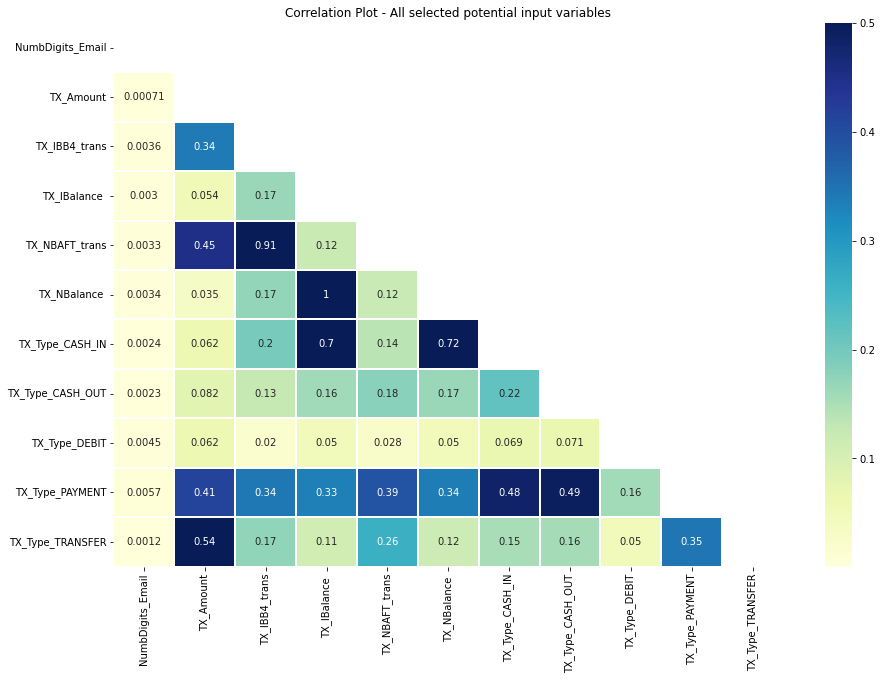

In [97]:
# get corr plots for all selected features..
#==============================================
df30FT = featuresT2
corr   = df30FT.corr().abs()
mask   = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmax=.5, mask=mask,linewidths=.2, cmap="YlGnBu", annot = True)
plt.title('Correlation Plot - All selected potential input variables')

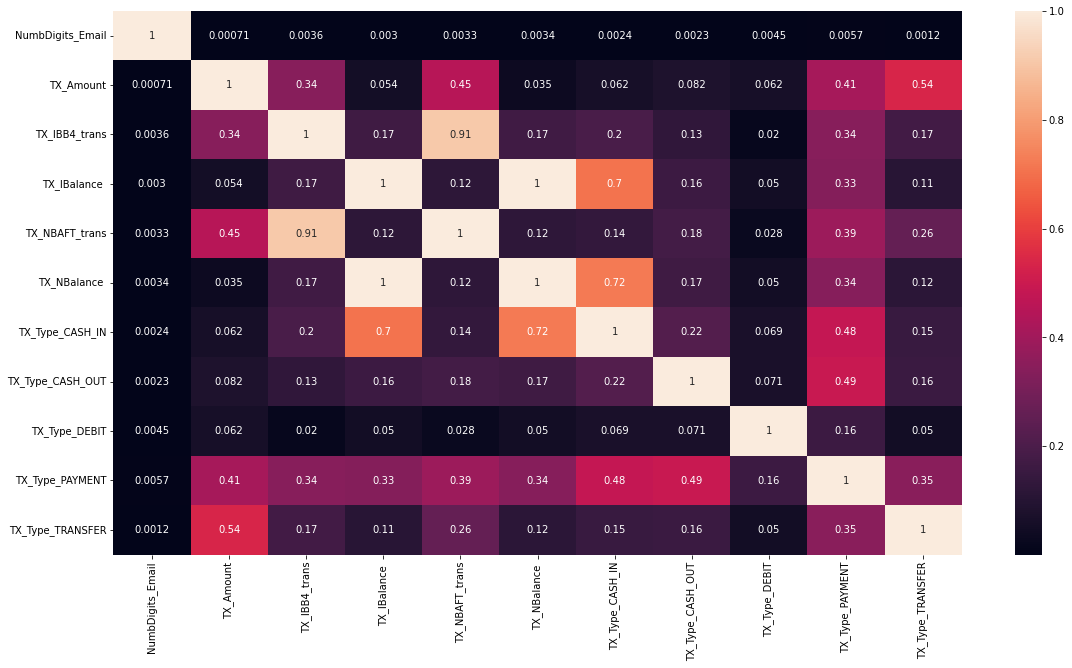

In [93]:
plt.figure(figsize = (19,10))
sns.heatmap(featuresT.corr().abs(), annot = True)
plt.savefig('heatmap.png')
plt.show()

* Variables such as "TX_Type_CASH_IN" & "TX_NBalance" have over 70% correlation... compared to "TX_Type_CASH_IN" & "TX_Amount" whose correlation is less than 7%.Since there are slightly more possible multicollinearity in the selected features, lets aim at reducing these effect in the model at the next step

## ** VIF(Reduce MultiCollinearity)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# there might be possible NaN entries, so need to fill with 0 where possible...
#==============================================================================
featuresT2.fillna(0, inplace=True)
def calculate_vif(featuresT2):
    vif = pd.DataFrame()
    vif["Features"] = featuresT2.columns
    vif["VIF"] = [variance_inflation_factor(featuresT2.values, i) for i in range(featuresT2.shape[1])]    
    return(vif)

In [40]:
# just sence check how the current selected features looks like...
featuresT2.head() 

,NumbDigits_Email,TX_Amount,TX_IBB4_trans,TX_IBalance,TX_NBAFT_trans,TX_NBalance,TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER
0,0,9839.64,0.0,170136.0,0.0,160296.36,0,0,0,1,0
1,0,1864.28,0.0,21249.0,0.0,19384.72,0,0,0,1,0
2,2,181.00,0.0,181.0,0.0,0.00,0,0,0,0,1
3,0,181.00,21182.0,181.0,0.0,0.00,0,1,0,0,0
4,2,11668.14,0.0,41554.0,0.0,29885.86,0,0,0,1,0


In [57]:
#List finally selected FEATURES/VARIABLES where they are not showing multicollinearity...
#=============================================================================================
vif = calculate_vif(featuresT2)
while vif['VIF'][vif['VIF'] > 5].any():  #10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    featuresT2.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(featuresT2)
    
print('List of finally selected FEATURES/VARIABLES with no multicollinearity are:')
print('==========================================================================')
list(vif['Features'])

List of finally selected FEATURES/VARIABLES with no multicollinearity are:


['NumbDigits_Email',
 'TX_Amount',
 'TX_IBB4_trans',
 'TX_IBalance ',
 'TX_Type_CASH_IN',
 'TX_Type_CASH_OUT',
 'TX_Type_DEBIT',
 'TX_Type_PAYMENT',
 'TX_Type_TRANSFER']

In [58]:
print('List of previous selected FEATURES/VARIABLES with potential multicollinearity are:')
print('==================================================================================')
list(featuresT)

List of previous selected FEATURES/VARIABLES with potential multicollinearity are:


['NumbDigits_Email',
 'TX_Amount',
 'TX_IBB4_trans',
 'TX_IBalance ',
 'TX_NBAFT_trans',
 'TX_NBalance ',
 'TX_Type_CASH_IN',
 'TX_Type_CASH_OUT',
 'TX_Type_DEBIT',
 'TX_Type_PAYMENT',
 'TX_Type_TRANSFER']

==================================================================================================================
 *Important: Note here that "TX_NBalance" & "TX_NBAFT_trans" were not finally selected from the VIF process
============================================================================================================


In [59]:
# get information on the finally selected variables...
#=====================================================
vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Features  9 non-null      object 
 1   VIF       9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


In [219]:
# get summary stats on the final variables selected...
#=====================================================
final_vars  = list(vif['Features']) + ['isFraud']
df000_AllT2 = df_merge[final_vars].fillna(0)
print('List(Summary Stats) of selected candidate drivers for the Models ')
print('=================================================================')
df000_AllT2.describe().transpose()


List(Summary Stats) of selected candidate drivers for the Models 


,count,mean,std,min,25%,50%,75%,max
NumbDigits_Email,20000.0,0.502000,8.671987e-01,0.00,0.0000,0.000,2.0000,2.0
TX_Amount,20000.0,125958.370278,2.967104e+05,2.39,5272.0175,15825.175,141661.6450,10000000.0
TX_IBB4_trans,20000.0,815947.585969,2.481525e+06,0.00,0.0000,0.000,288767.7500,22800000.0
TX_IBalance,20000.0,805084.571813,2.213575e+06,0.00,0.0000,19943.500,127412.6125,22400000.0
TX_Type_CASH_IN,20000.0,0.174900,3.798910e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_CASH_OUT,20000.0,0.182400,3.861835e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_DEBIT,20000.0,0.022050,1.468498e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_PAYMENT,20000.0,0.522000,4.995283e-01,0.00,0.0000,1.000,1.0000,1.0
TX_Type_TRANSFER,20000.0,0.098650,2.981990e-01,0.00,0.0000,0.000,0.0000,1.0
isFraud,20000.0,0.004050,6.351220e-02,0.00,0.0000,0.000,0.0000,1.0


 ================================================================================================================== ** From the results table above, the features namely: "TX_Amount/TX_IBB4_trans/TX_IBalance" will need to be binned & dummied. In this case, we can accurately understand and identify at what level of transaction amount the frauds might have been committed at...
 

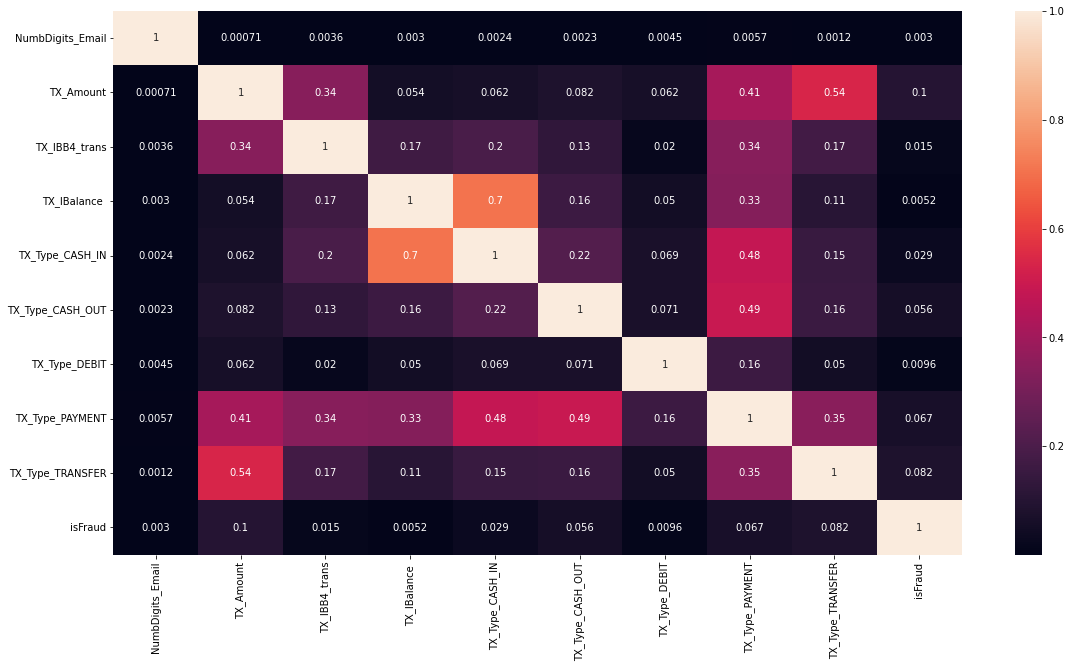

In [220]:
# Correlation plot of Final selected potential input variables...
# there's a high correlation of 70% between "TX_Type_CASH_IN" & "TX_IBalance"
#============================================================================
plt.figure(figsize = (19,10))
sns.heatmap(df000_AllT2.corr().abs(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [222]:
df000_AllT2.columns

Index(['NumbDigits_Email', 'TX_Amount', 'TX_IBB4_trans', 'TX_IBalance ',
       'TX_Type_CASH_IN', 'TX_Type_CASH_OUT', 'TX_Type_DEBIT',
       'TX_Type_PAYMENT', 'TX_Type_TRANSFER', 'isFraud'],
      dtype='object')

## BIN SELECTED VARIABLES BEFORE DEVELOPING THE MODELS

In [224]:
# make sure all vars are numeric..
#================================
df000_AllT2 = df000_AllT2.apply(pd.to_numeric, errors = 'coerce')
df000_AllT2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumbDigits_Email,20000.0,0.502000,8.671987e-01,0.00,0.0000,0.000,2.0000,2.0
TX_Amount,20000.0,125958.370278,2.967104e+05,2.39,5272.0175,15825.175,141661.6450,10000000.0
TX_IBB4_trans,20000.0,815947.585969,2.481525e+06,0.00,0.0000,0.000,288767.7500,22800000.0
TX_IBalance,20000.0,805084.571813,2.213575e+06,0.00,0.0000,19943.500,127412.6125,22400000.0
TX_Type_CASH_IN,20000.0,0.174900,3.798910e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_CASH_OUT,20000.0,0.182400,3.861835e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_DEBIT,20000.0,0.022050,1.468498e-01,0.00,0.0000,0.000,0.0000,1.0
TX_Type_PAYMENT,20000.0,0.522000,4.995283e-01,0.00,0.0000,1.000,1.0000,1.0
TX_Type_TRANSFER,20000.0,0.098650,2.981990e-01,0.00,0.0000,0.000,0.0000,1.0
isFraud,20000.0,0.004050,6.351220e-02,0.00,0.0000,0.000,0.0000,1.0


In [225]:
### Important: BIN ALL THESE before modelling ...
#================================================
df000_AllT2['TX_Amount_Bin']      = pd.qcut(df000_AllT2['TX_Amount'],      q=10, duplicates='drop', precision=0)
df000_AllT2['TX_IBB4_trans_Bin']  = pd.qcut(df000_AllT2['TX_IBB4_trans'],  q=10, duplicates='drop', precision=0)
df000_AllT2['TX_IBalance_Bin']    = pd.qcut(df000_AllT2['TX_IBalance '],   q=10, duplicates='drop', precision=0)

#df000_AllT2['TX_IBalance_Bin']  = pd.qcut(df000_AllT2['TX_IBalance'],  q=10, duplicates='drop', precision=0)


In [226]:
df000_AllT2.dtypes

NumbDigits_Email        int64
TX_Amount             float64
TX_IBB4_trans         float64
TX_IBalance           float64
TX_Type_CASH_IN         uint8
TX_Type_CASH_OUT        uint8
TX_Type_DEBIT           uint8
TX_Type_PAYMENT         uint8
TX_Type_TRANSFER        uint8
isFraud                 int64
TX_Amount_Bin        category
TX_IBB4_trans_Bin    category
TX_IBalance_Bin      category
dtype: object

In [227]:
# drop off the original vars you have binned..
#============================================
vars_drop = ['TX_Amount','TX_IBB4_trans','TX_IBalance ']
             
df000_AllT2.drop(vars_drop, axis=1, inplace=True)
df000_AllT2.dtypes

NumbDigits_Email        int64
TX_Type_CASH_IN         uint8
TX_Type_CASH_OUT        uint8
TX_Type_DEBIT           uint8
TX_Type_PAYMENT         uint8
TX_Type_TRANSFER        uint8
isFraud                 int64
TX_Amount_Bin        category
TX_IBB4_trans_Bin    category
TX_IBalance_Bin      category
dtype: object

## *(OHE) One Hot Encode - ALL CATEGORICAL VARIABLES

In [228]:
# OHE all the *categorical* vars by using "get_dummies" ...
#==========================================================
df000_AllT2_Dummy = pd.get_dummies(df000_AllT2, drop_first = False) 
df000_AllT2_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   NumbDigits_Email                           20000 non-null  int64
 1   TX_Type_CASH_IN                            20000 non-null  uint8
 2   TX_Type_CASH_OUT                           20000 non-null  uint8
 3   TX_Type_DEBIT                              20000 non-null  uint8
 4   TX_Type_PAYMENT                            20000 non-null  uint8
 5   TX_Type_TRANSFER                           20000 non-null  uint8
 6   isFraud                                    20000 non-null  int64
 7   TX_Amount_Bin_(1.0, 2024.0]                20000 non-null  uint8
 8   TX_Amount_Bin_(2024.0, 4078.0]             20000 non-null  uint8
 9   TX_Amount_Bin_(4078.0, 6631.0]             20000 non-null  uint8
 10  TX_Amount_Bin_(6631.0, 9911.0]             200

In [229]:
df000_AllT2_Dummy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumbDigits_Email,20000.0,0.50200,0.867199,0.0,0.0,0.0,2.0,2.0
TX_Type_CASH_IN,20000.0,0.17490,0.379891,0.0,0.0,0.0,0.0,1.0
TX_Type_CASH_OUT,20000.0,0.18240,0.386184,0.0,0.0,0.0,0.0,1.0
TX_Type_DEBIT,20000.0,0.02205,0.146850,0.0,0.0,0.0,0.0,1.0
TX_Type_PAYMENT,20000.0,0.52200,0.499528,0.0,0.0,1.0,1.0,1.0
TX_Type_TRANSFER,20000.0,0.09865,0.298199,0.0,0.0,0.0,0.0,1.0
isFraud,20000.0,0.00405,0.063512,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(1.0, 2024.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(2024.0, 4078.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(4078.0, 6631.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0


NB: The only feature not binned was "NumbDigits_Email"... As its values are smaller, we'll re-scaled it before pushing it through the models

In [230]:
# bring back important features......
#=====================================
df000_AllT2_Dummy['TX_Originator'] = df_merge['TX_Originator']
df000_AllT2_Dummy['isFraud']       = df_merge['isFraud']
df000_AllT2_Dummy.head()


,NumbDigits_Email,TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER,isFraud,"TX_Amount_Bin_(1.0, 2024.0]","TX_Amount_Bin_(2024.0, 4078.0]","TX_Amount_Bin_(4078.0, 6631.0]",...,"TX_IBB4_trans_Bin_(1707592.0, 22800000.0]","TX_IBalance_Bin_(-1.0, 416.0]","TX_IBalance_Bin_(416.0, 9373.0]","TX_IBalance_Bin_(9373.0, 19944.0]","TX_IBalance_Bin_(19944.0, 35360.0]","TX_IBalance_Bin_(35360.0, 79832.0]","TX_IBalance_Bin_(79832.0, 262493.0]","TX_IBalance_Bin_(262493.0, 3033554.0]","TX_IBalance_Bin_(3033554.0, 22400000.0]",TX_Originator
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,C1231006815
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,C1666544295
2,2,0,0,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,C1305486145
3,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,C840083671
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,C2048537720


In [231]:
# re-check & remove any potential dups in the ID...
#==================================================
df000_AllT2_DummyF = df000_AllT2_Dummy.drop_duplicates(subset = ["TX_Originator"])
df000_AllT2_DummyF['isFraud'].value_counts()

0    19919
1       81
Name: isFraud, dtype: int64

Verified: Distribution of Fraud cases in the Final dataset:
0    19919
1       81
Name: isFraud, dtype: int64



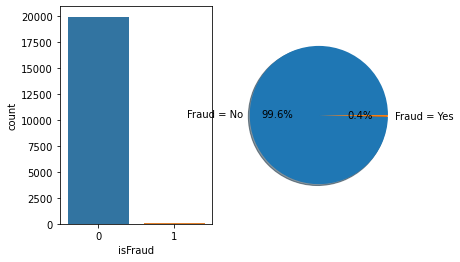

In [232]:
print('Verified: Distribution of Fraud cases in the Final dataset:')
print('===========================================================')
print(df000_AllT2_DummyF['isFraud'].value_counts())
print('')

ax      = plt.subplot(1,2,1)
sns.countplot(x='isFraud', data=df000_AllT2_DummyF)
labels2 = ['Fraud = No', 'Fraud = Yes']
labels1 = df000_AllT2_DummyF['isFraud'].astype('category').cat.categories.tolist()
counts1 = df000_AllT2_DummyF['isFraud'].value_counts()
sizes   = [counts1[var_cat] for var_cat in labels1]
ax      = plt.subplot(1,2,2)
ax.pie(sizes, labels = labels2, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

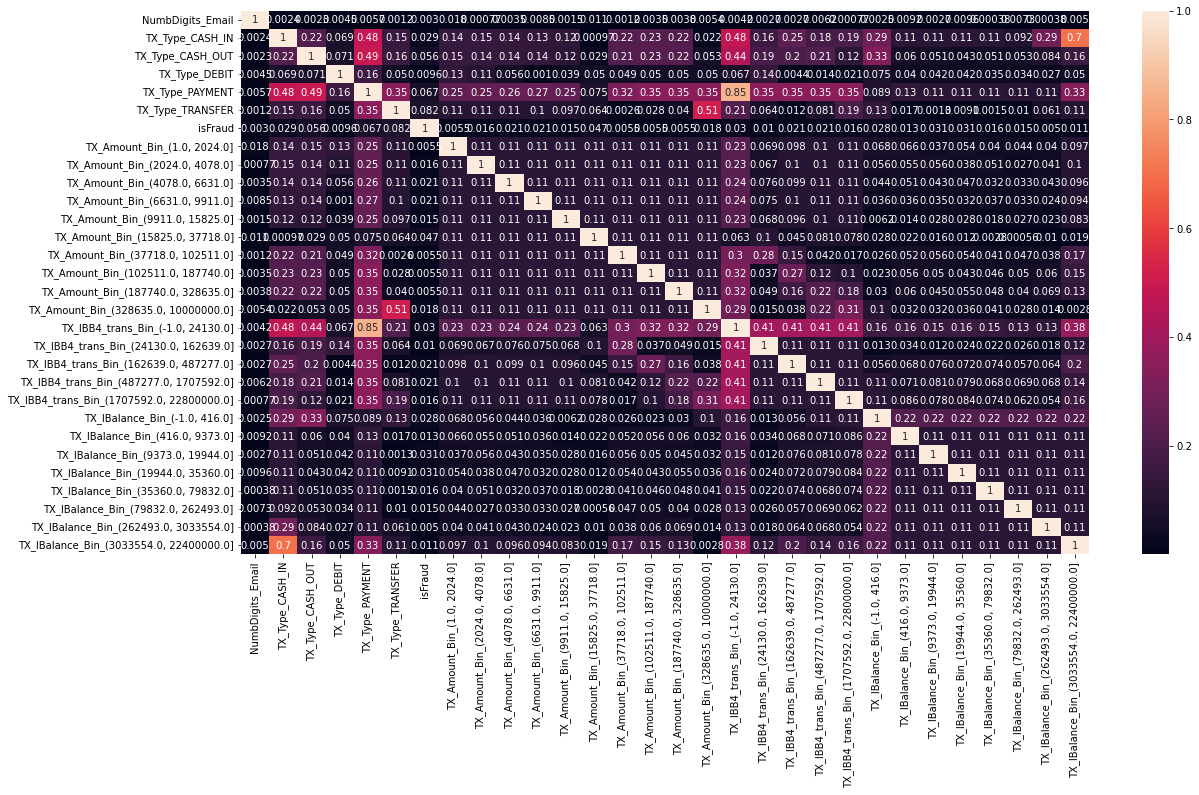

In [233]:
#correlation plot of selected candidate variables...
plt.figure(figsize = (19,10))
sns.heatmap(df000_AllT2_DummyF.corr().abs(), annot = True)
plt.savefig('heatmap.png')
plt.show()

### ==================================================================================================================
 As seen, only TX_Type_PAYMENT & TX_IBB4_trans_Bin_(-1.0, 24130.0], & "TX_IBalance_Bin_(3033554.0, 22400000.0) vs TX_Type_CASH_IN" have correlation of 70% +... These will be tested during the final model build

## Step 6 - Splitting Model data into Training and Testing sets

In [234]:
#=======================================================================================
# Feature re-Scaling
#=======================================================================================
'''Feature Scaling using MinMaxScaler essentially shrinks the range such
   that the range is now between 0 and n. This helps the algorithms to 
   perform better when input numerical variables fall within a similar scale
'''

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df30   = df000_AllT2_DummyF[df000_AllT2_DummyF.columns.difference(['TX_Originator'])] 

HR_col = list(df30.columns)
HR_col.remove('isFraud')

for col in HR_col:
    df30[col]   = df30[col].astype(float)
    df30[[col]] = scaler.fit_transform(df30[[col]])
df30['isFraud'] = pd.to_numeric(df30['isFraud'], downcast='float') # change target var into *float*
df30.head()


,NumbDigits_Email,"TX_Amount_Bin_(1.0, 2024.0]","TX_Amount_Bin_(102511.0, 187740.0]","TX_Amount_Bin_(15825.0, 37718.0]","TX_Amount_Bin_(187740.0, 328635.0]","TX_Amount_Bin_(2024.0, 4078.0]","TX_Amount_Bin_(328635.0, 10000000.0]","TX_Amount_Bin_(37718.0, 102511.0]","TX_Amount_Bin_(4078.0, 6631.0]","TX_Amount_Bin_(6631.0, 9911.0]",...,"TX_IBalance_Bin_(35360.0, 79832.0]","TX_IBalance_Bin_(416.0, 9373.0]","TX_IBalance_Bin_(79832.0, 262493.0]","TX_IBalance_Bin_(9373.0, 19944.0]",TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER,isFraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [235]:
df30.describe().T

,count,mean,std,min,25%,50%,75%,max
NumbDigits_Email,20000.0,0.25100,0.433599,0.0,0.0,0.0,1.0,1.0
"TX_Amount_Bin_(1.0, 2024.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(102511.0, 187740.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(15825.0, 37718.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(187740.0, 328635.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(2024.0, 4078.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(328635.0, 10000000.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(37718.0, 102511.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(4078.0, 6631.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0
"TX_Amount_Bin_(6631.0, 9911.0]",20000.0,0.10000,0.300008,0.0,0.0,0.0,0.0,1.0


* Notice here that the feature "NumbDigits_Email" has also been re-scaled into 0-1

In [108]:
### NumbDigits_Emailplt.figure(figsize = (19,10))
### NumbDigits_Emailsns.heatmap(df30.corr().abs(), annot = True)
### NumbDigits_Emailplt.savefig('heatmap.png')
### NumbDigits_Emailplt.show()

In [236]:
#re-order the feature positions as desired...
#============================================
df30 = df30[['isFraud'] + [col for col in df30.columns if col not in ['isFraud']]]
df30.head()

,isFraud,NumbDigits_Email,"TX_Amount_Bin_(1.0, 2024.0]","TX_Amount_Bin_(102511.0, 187740.0]","TX_Amount_Bin_(15825.0, 37718.0]","TX_Amount_Bin_(187740.0, 328635.0]","TX_Amount_Bin_(2024.0, 4078.0]","TX_Amount_Bin_(328635.0, 10000000.0]","TX_Amount_Bin_(37718.0, 102511.0]","TX_Amount_Bin_(4078.0, 6631.0]",...,"TX_IBalance_Bin_(3033554.0, 22400000.0]","TX_IBalance_Bin_(35360.0, 79832.0]","TX_IBalance_Bin_(416.0, 9373.0]","TX_IBalance_Bin_(79832.0, 262493.0]","TX_IBalance_Bin_(9373.0, 19944.0]",TX_Type_CASH_IN,TX_Type_CASH_OUT,TX_Type_DEBIT,TX_Type_PAYMENT,TX_Type_TRANSFER
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [237]:
#===========================================================================
# Assign the target to a new dataframe and convert it into a numerical feature
# NB: # Prior to implementing or applying any Machine Learning algorithms,
# we must split dataset into training and testing from our master dataframe
#============================================================================
target = df30['isFraud'].copy() # "target" has only the "fraud" cases

# let's remove the target(fraud) feature from the dataset
df30_Drop = df30[df30.columns.difference(['isFraud'])] # this has only the predictor vars...


In [238]:
#====================================================================
# Since we have class imbalance (i.e. more Non-Fraud=0 than Fraud=1)..
# let's use (stratify= target) to maintain the same ratio as in the 
# training dataset when splitting the dataset
#======================================================================
X_train, X_test, y_train, y_test = train_test_split(df30_Drop,
                                                    target,
                                                    test_size    = 0.30, #Test(30%) & Train(70%)
                                                    random_state = 7,
                                                    stratify     = target) 

print('Shape of all transactions in dataset: {}'.format(df30_Drop.shape))
print('Shape of all Fraud transactions in dataset: {}'.format(target.shape))

print("Number transactions in X_train dataset: ", X_train.shape)
print("Number transactions in y_train dataset: ", y_train.shape)
print("Number transactions in X_test dataset: " , X_test.shape)
print("Number transactions in y_test dataset: " , y_test.shape)

Shape of all transactions in dataset: (20000, 29)
Shape of all Fraud transactions in dataset: (20000,)
Number transactions in X_train dataset:  (14000, 29)
Number transactions in y_train dataset:  (14000,)
Number transactions in X_test dataset:  (6000, 29)
Number transactions in y_test dataset:  (6000,)


In [239]:
# Let's check for.. percentage of "Fraud" imbalance in the data ...
#==================================================================
print('Percentage of "Fraud" imbalance in the TRAIN data is:')
print('=====================================================')
print('0=(Non-Fraud)', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('1=(Fraud)',     round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('')
print('Percentage of "Fraud" imbalance in the TEST data is:')
print('====================================================')
print('0=(Non-Fraud)', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset')
print('1=(Fraud)',     round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset')

Percentage of "Fraud" imbalance in the TRAIN data is:
0=(Non-Fraud) 99.59 % of the dataset
1=(Fraud) 0.41 % of the dataset

Percentage of "Fraud" imbalance in the TEST data is:
0=(Non-Fraud) 99.6 % of the dataset
1=(Fraud) 0.4 % of the dataset


*We have accurately stratify our dataset into train=70% & test=30%, with equal proportions of our "isFraud" casees

## Step 7 -  SMOTE Application(on Train) - Imbalanced Dataset

In [240]:
#==================================================================================================================
# NB: By applying oversampling technique only on the training data, none of the information in the 
# validation(test) data is being used to create synthetic observations. So these results should be generalizable.
#==================================================================================================================
#====================================================================================
# Both categories will have equal amount of records. More specifically, 
# the minority 'Fraud'class has been increased to the total number of majority class
#====================================================================================


# Apply SMOTE to only the TRAIN dataset...
#=========================================
from imblearn.over_sampling  import SMOTE

sm = SMOTE(random_state=2)
X_trainS, y_trainS = sm.fit_resample(X_train, y_train)


print("Before OverSampling, counts of label(y_train) '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label(y_train) '0': {} \n".format(sum(y_train==0)))
print('')
print("After OverSampling, counts of label(y_trainS) '1': {}".format(sum(y_trainS==1)))
print("After OverSampling, counts of label(y_trainS) '0': {}".format(sum(y_trainS==0)))
print('')
print('After OverSampling, the shape of X_trainS: {}'.format(X_trainS.shape))
print('After OverSampling, the shape of y_trainS: {} \n'.format(y_trainS.shape))


Before OverSampling, counts of label(y_train) '1': 57
Before OverSampling, counts of label(y_train) '0': 13943 


After OverSampling, counts of label(y_trainS) '1': 13943
After OverSampling, counts of label(y_trainS) '0': 13943

After OverSampling, the shape of X_trainS: (27886, 29)
After OverSampling, the shape of y_trainS: (27886,) 



## Step 8 - Build Logistic Regression Models

In [241]:
# fit the logit models on the SMOTE dataset...
#=============================================
lc_model = LogisticRegression()
lc_model.fit(X_trainS, y_trainS)

LogisticRegression()

In [242]:
# use your fitted models to predict on the test dataset..
predictions = lc_model.predict(X_test)

In [243]:
# get the Accuracy measure for your logit models ..
metrics.accuracy_score(y_test,predictions)

0.9498333333333333

In [244]:
# get CONFUSION MATRIX on the test dataset...
print("CONFUSION MATRIX for TEST dataset: Logistic Regression")
print("======================================================")
print(confusion_matrix(y_test,predictions))

CONFUSION MATRIX for TEST dataset: Logistic Regression
[[5678  298]
 [   3   21]]


In [245]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[5678,  298],
       [   3,   21]])

## Step 9 - Model Performance Evaluation Metrics



Model Perfomance Evaluation: TEST data are:
Accuracy: 0.9498333333333333
Precision: 0.06583072100313479
Recall: 0.875


Classification report for TRAIN: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     13943
         1.0       0.07      0.96      0.14        57

    accuracy                           0.95     14000
   macro avg       0.54      0.96      0.56     14000
weighted avg       1.00      0.95      0.97     14000

Classification Report for TEST: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      5976
         1.0       0.07      0.88      0.12        24

    accuracy                           0.95      6000
   macro avg       0.53      0.91      0.55      6000
weighted avg       1.00      0.95      0.97      6000



Confusion Matrix for TEST dataset: Logistic Regression


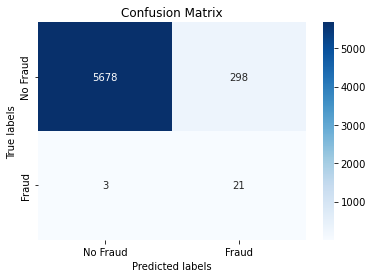



ROC curve for TEST dataset: Logistic Regression
AUC score: 0.982


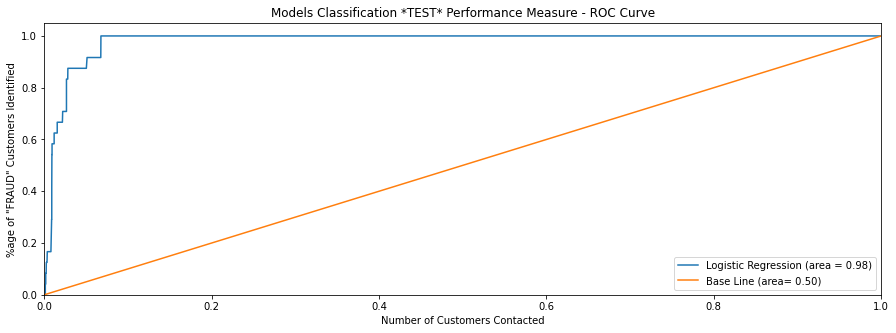



Relative Importance Plot: Logit Model Drivers


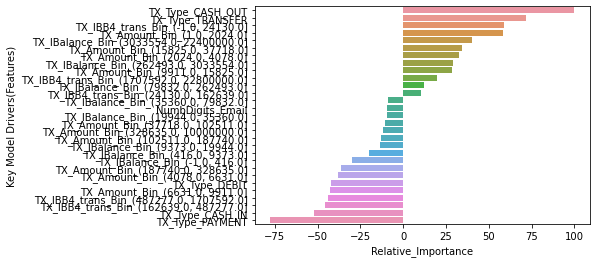

In [249]:
print("\n")
print("Model Perfomance Evaluation: TEST data are:")
print("=============================================")
print("Accuracy:",  metrics.accuracy_score(y_test,  predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:",    metrics.recall_score(y_test,    predictions))
print("")
#print("Confusion Matrics:","\n",confusion_matrix(y_test,predictions))
print("")

print("====================================================")
print("Classification report for TRAIN: Logistic Regression")
print("====================================================")
print(classification_report(y_train, lc_model.predict(X_train)))
print("====================================================")
print("Classification Report for TEST: Logistic Regression")
print("===================================================")
print(classification_report(y_test, lc_model.predict(X_test)))
print("\n")

print("Confusion Matrix for TEST dataset: Logistic Regression")
print("======================================================")
class_names= ['No Fraud','Fraud'] # name  of classes
fig, ax    = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
## plt.tight_layout()
## plt.ylabel('Actual label')
## plt.xlabel('Predicted label')
## 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Fraud', 'Fraud']);
ax.yaxis.set_ticklabels(['No Fraud', 'Fraud']);
plt.show()
print("\n")

# Create ROC Graphs
#===================
print("ROC curve for TEST dataset: Logistic Regression")
print("===============================================")

from sklearn.metrics import roc_curve
#lc_model.fit(X_train, y_train) # fit optimised model to the training data
probs = lc_model.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the fraud cases
lrg_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % lrg_opt_roc_auc);
probs

lrg_fpr, lrg_tpr, lrg_thresholds = roc_curve(y_test, lc_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15, 5))

# Plot Logistic ROC curve
plt.plot(lrg_fpr, lrg_tpr, label='Logistic Regression (area = %0.2f)' % lrg_opt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Line (area= 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Number of Customers Contacted')#False Positive Rate
plt.ylabel('%age of "FRAUD" Customers Identified') # True Positive Rate
plt.title('Models Classification *TEST* Performance Measure - ROC Curve') #ROC Graph
plt.legend(loc="lower right")
plt.show()
print("\n")

# # generate RELATIVE IMPORTANCE key Model Drivers
# #===============================================
s1 = pd.DataFrame({"Key Model Drivers(Features)": X_train.columns,
                   "Importance": lc_model.coef_[0],
                   "Relative_Importance": 100.0*(lc_model.coef_[0]/lc_model.coef_[0].max())}).sort_values('Importance', ascending=False)

s1b = s1.head(30)
sns.barplot(x="Relative_Importance",y ="Key Model Drivers(Features)", data = s1b)  

print('Relative Importance Plot: Logit Model Drivers')
print('=========================================================')


In [247]:
# select top 30 Model Influential Drivers...
print("\n")
print('List of Top Model Influential Features: Logit Model Drivers')
print('===========================================================')
s1.head(30)



List of Top Model Influential Features: Logit Model Drivers


,Key Model Drivers(Features),Importance,Relative_Importance
25,TX_Type_CASH_OUT,8.505343,100.000000
28,TX_Type_TRANSFER,6.120402,71.959492
11,"TX_IBB4_trans_Bin_(-1.0, 24130.0]",5.015639,58.970454
1,"TX_Amount_Bin_(1.0, 2024.0]",4.947638,58.170945
19,"TX_IBalance_Bin_(3033554.0, 22400000.0]",3.417189,40.176969
3,"TX_Amount_Bin_(15825.0, 37718.0]",2.901291,34.111389
5,"TX_Amount_Bin_(2024.0, 4078.0]",2.755259,32.394450
18,"TX_IBalance_Bin_(262493.0, 3033554.0]",2.464423,28.975004
10,"TX_Amount_Bin_(9911.0, 15825.0]",2.422397,28.480886
13,"TX_IBB4_trans_Bin_(1707592.0, 22800000.0]",1.691449,19.886902


In [ ]:
############################################################
#                                                          #
#              E N D     OF      S T O R Y                 #
#                                                          #
############################################################